In [31]:
from sympy import *
init_printing()

# McElreath & Boyd - Animal Conflict

This worksheet shows some examples of calculations. It also shows how one can make the plots from chapter 2  using `sympy` and some additional packages. 

## Preliminaries: Ternary plots using `egtplot`
For generating the ternary plot in Figure 2.3, one needs to install the [`egtplot`](https://github.com/mirzaevinom/egtplot) package (see also the accompanying paper by Mirzaev et al (2018) on biorXiv: https://www.biorxiv.org/content/10.1101/300004v1). If one uses anaconda, [this post](https://stackoverflow.com/questions/41060382/using-pip-to-install-packages-to-anaconda-environment) contains useful information about how to install additional packages. Let me know if you are stuck. Thanks to Arthur Newbury for suggesting the `egtplot` package.

## 2.1 Equilibria of the Hawk-Dove game
As reasoned on pp. 43-44 in McE&B, to find the internal equilibrium $0<\hat{p}<1$, we need to solve $W(H) = W(D)$ or
\begin{align}
w_{0} + \hat{p}\frac{v-c}{2}+\left(1-\hat{p}\right)v =  w_{0} + \left (1 - \hat{p}\right)\frac{v}{2}
\end{align}
for $\hat{p}$.

Doing this in `sympy`, the easiest is to use the [`solve()`](https://docs.sympy.org/latest/modules/solvers/solvers.html#sympy.solvers.solvers.solve) function. Here, the first argument is the equation to be solved and should be in a form like $W(H)-W(D)=0$, rather than $W(H) = W(D)$:

In [32]:
w0, phat, p, v, c = symbols("w0 phat p v c")

WH = w0 + p*(v-c)/2 + (1-p)*v

WD = w0 + (1-p)*(v/2)

to_solve_for_eq = WH-WD

# substitute for p = phat, as we solve for equilibria. Typically, I just solve
# directly for p, but let's be formally correct about things and write phat
# when solving for equilibria
to_solve_for_eq = to_solve_for_eq.subs({p:phat})

solve(to_solve_for_eq,phat)

and we are done.

## 2.1 continued: plotting $\Delta p$ as in Fig 2.1
As on p. 43, the expression for the change in Hawk alleles per generation is given by
\begin{align}
\Delta p = p \left (1 - p \right ) \frac{W(H) - W(D)}{\bar{w}}.
\end{align}
For the sake of illustrating how to plot things in Python, here we plot this expression against $p$, using `sympy`'s [plotting functionality](https://docs.sympy.org/latest/modules/plotting.html#module-sympy.plotting.plot). See the example below.

*Note*: If you want to add mathematical notation to the labels, check out the corresponding LaTeX code [here](https://en.wikibooks.org/wiki/LaTeX/Mathematics). LaTeX is a programme to write mathematical notation that is a bit more flexible than commonly used in Word.

/Library/Python/3.7/site-packages/sympy/plotting/plot.py:1065: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax[i].spines['left'].set_smart_bounds(True)
/Library/Python/3.7/site-packages/sympy/plotting/plot.py:1066: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax[i].spines['bottom'].set_smart_bounds(False)


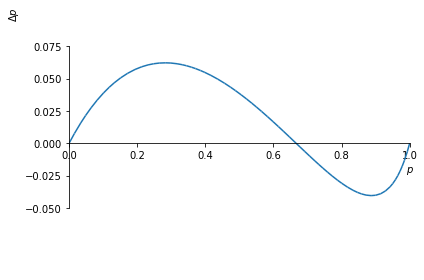

In [33]:
# the difference equation specifying the per-generation
# change in Hawk alleles:
delta_p = p*(1-p)*(WH-WD)/(p*WH+(1-p)*WD)

# substitute for parameters used in Fig 2.1
delta_p = delta_p.subs({v:2,c:3,w0:1})
                    
# plot the function Delta p for p between 0 and 1. 
plot(delta_p,(p,0,1)
     ,ylim=[-0.1,0.1]
     ,ylabel=r"$\Delta p$" # labels etc
     ,xlabel=r"$p$")

# note: the 'r' in front of the ""
# quotation marks above tells python not to interpret
# backslashes (normally python uses backslashes
# to do particular things, for example printing a newline
# when it encounters "\n". Here, however, we need
# backslashes to write mathematical notation in LaTeX code

## 2.2 Retaliator: can Hawks invade? Solving inequilities using `reduce_inequalities`

The first example that I selected from section 2.2 is the invasion condition of Hawks in a Dove/Retaliator population, on p. 49. I selected this example to show that `sympy` can also solve for inequalities. Particularly the function [`reduce_inequalities()`](https://docs.sympy.org/latest/modules/solvers/inequalities.html#sympy.solvers.inequalities.reduce_inequalities) may be useful, although it's solutons may require further simplification by hand (typically not an issue using the `Reduce[]` function in mathematia).

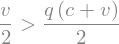

In [34]:
q = symbols("q")

# fitness of invading Hawk
WH_Invades = w0+q*(v-c)/2 + (1-q)*v

# fitness of Dove/Retaliator
WDR = w0+ v/2

# solve rational inequalities:
simplify(reduce_inequalities([WH_Invades > WDR],[q]))

Irritatingly, `sympy` cannot reduce this further. However, multiplying both sides by $\frac{2}{c+v}$ and we have the answer that $q<\frac{v}{v+c}$.

## 2.2 Create ternary plots using `egtplot`

We now use the [`egtplot`](https://github.com/mirzaevinom/egtplot/) package to create the ternary plot in Fig. 2.3 on p. 51 of McE&B. After you have installed the package (see top of this worksheet), first load the package as follows:

In [35]:
from egtplot import plot_static

#### Specifying the payoff matrix
Then we [define a function](https://docs.python.org/3/tutorial/controlflow.html#defining-functions) (using the python keyword `def`) that gives the payoff matrix for the 3-strategy game. This matrix is given in Table 2.2 of McE&B on p. 47.

In [36]:
def payoff_matrix_HDR(v,c):
    
    # see table 2.2. Order is hawk, dove, retaliator
    return [[(v-c)/2,v,(v-c)/2],[0,v/2,v/2],[(v-c)/2,v/2,v/2]]

Then, we specify a list with parameter values (i.e., the numerical values of $v$ and $c$). The function `payoff_matrix_HDR(v,c)` defined above uses two 'arguments', namely `v` and then `c`, The following list uses the same order, but then specifies *values* for these arguments

In [37]:
# v=2, c=3
parameter_values = [[2],[3]]

1it [00:00,  2.41it/s]


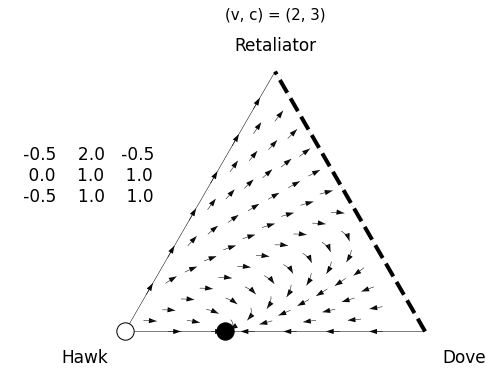

In [38]:
simplex=plot_static(payoff_entries=parameter_values,custom_func=payoff_matrix_HDR,vert_labels=["Hawk","Dove","Retaliator"])

Relative to the book's Fig 2.3 on p. this is in mirror format. I could resolve this by changing the order in the payoff matrix in the function `payoff_matrix_HDR()` defined above, but for the sake of readability I keep that intact. 

We see an open dot $\circ$ at the Hawk corner, meaning that a population exclusively consisting of Hawks is prone to invasion by either Doves or Retaliators. 

Next, there is a dashed line on the Retaliator-Dove edge. This indicates a *line of equilibria* (i.e., any point on that line is stable). Indeed, a Retaliator is indistinguishable from a Dove when there are no Hawks around, so that makes sense.

Finally, the black dot is the Hawk-Dove ESS, given by $\hat{p} = \frac{v}{c}$.

I have yet to find out how to edit things to point out the invasion barrier $q < \frac{v}{v+c}$, hence any tips on this would be welcome.